In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('data_bcn/aire_bcn_desembre.csv')
contam = pd.read_csv('data_bcn/contaminants.csv')
stations = pd.read_csv('data_bcn/estacions.csv')

# Dropping useless columns
 - Since all data is from Barcelona, CODI_PROVINCIA, PROVINCIA, CODI_MUNICIPI and MUNICIPI can be dropped.  
 - All columns starting with V... can also be dropped, as they are not informative and present mostly the same value: V. In fact, the meaning of this value can't be found anywhere.

In [5]:
columns = ['CODI_PROVINCIA', 'PROVINCIA', 'CODI_MUNICIPI', 'MUNICIPI']
for col in list(df.columns):
    if col[0] == 'V':
        columns.append(col)
df = df.drop(columns, axis=1)

# Standardize column names
 - We will be changing everything to lower case and removing the 'H' from the hour columns

In [6]:
new_columns = {}
for col in list(df.columns):
    if col[0] == 'H':
        new_columns.update({col: col.replace('H', '')})
    else:
        new_columns.update({col: col.lower()})
df.rename(columns=new_columns, inplace=True)

# Plotting the distribution of data for stations

In [7]:
df["estacio"].unique()

array([ 4, 42, 43, 44, 50, 54, 57, 58])

In [8]:
df['estacio'] = df['estacio'].astype(str)

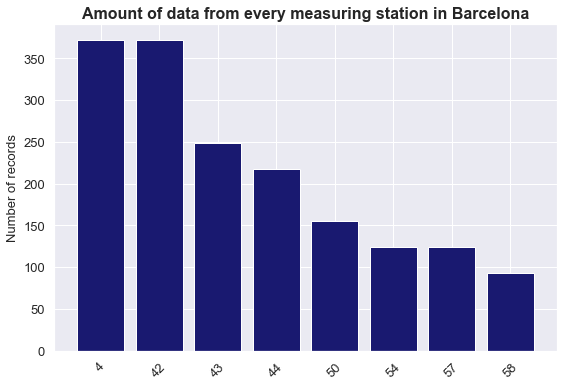

In [9]:
plt.figure(figsize = (9, 6)) #determine the size of the chart
plt.bar(x = df["estacio"].unique(),
        height = df["estacio"].value_counts(),
        color = "midnightblue")
plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Amount of data from every measuring station in Barcelona", fontsize = 16, fontweight = "bold")
plt.ylabel("Number of records", fontsize = 13 )
plt.show()

In [10]:
df.head()

,estacio,codi_contaminant,any,mes,dia,01,02,03,04,05,...,15,16,17,18,19,20,21,22,23,24
0,4,7,2021,12,1,23.0,27.0,13.0,1.0,1.0,...,15.0,21.0,8.0,4.0,3.0,2.0,3.0,2.0,2.0,1.0
1,4,7,2021,12,2,2.0,2.0,2.0,1.0,1.0,...,5.0,4.0,5.0,14.0,8.0,8.0,2.0,2.0,1.0,2.0
2,4,7,2021,12,3,3.0,1.0,1.0,1.0,1.0,...,14.0,15.0,16.0,42.0,78.0,110.0,155.0,107.0,96.0,69.0
3,4,7,2021,12,4,64.0,55.0,35.0,4.0,4.0,...,3.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
4,4,7,2021,12,5,1.0,1.0,2.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [11]:
stations.head()

,Estacio,nom_cabina,codi_dtes,zqa,codi_eoi,Longitud,Latitud,ubicacio,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Clas_1,Clas_2,Codi_Contaminant
0,50,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.3864,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,8
1,50,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.3864,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,14
2,50,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.3864,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,7
3,50,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.3864,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,12
4,43,Barcelona - Eixample,IH,1,8019043,2.1538,41.3853,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,8


In [12]:
stations = stations[['Estacio', 'nom_cabina', 'Longitud', 'Latitud']]
stations.head()
stations.Estacio.unique()

array([50, 43, 44, 57,  4, 42, 54])

In [13]:
stations = stations.drop_duplicates(keep='first')
stations.reset_index(drop=True, inplace=True)
stations.head()

,Estacio,nom_cabina,Longitud,Latitud
0,50,Barcelona - Ciutadella,2.1874,41.3864
1,43,Barcelona - Eixample,2.1538,41.3853
2,44,Barcelona - Gràcia,2.1534,41.3987
3,57,Barcelona - Palau Reial,2.1151,41.3875
4,4,Barcelona - Poblenou,2.2045,41.4039


In [14]:
cols = []
for i in range(len(stations.columns)):
    cols.append(stations.columns[i].lower())
stations.columns = cols
stations.columns

Index(['estacio', 'nom_cabina', 'longitud', 'latitud'], dtype='object')

In [15]:
stations['estacio'] = stations['estacio'].astype(str)

In [16]:
full = df.merge(stations, on='estacio')

In [17]:
full.head()

,estacio,codi_contaminant,any,mes,dia,01,02,03,04,05,...,18,19,20,21,22,23,24,nom_cabina,longitud,latitud
0,4,7,2021,12,1,23.0,27.0,13.0,1.0,1.0,...,4.0,3.0,2.0,3.0,2.0,2.0,1.0,Barcelona - Poblenou,2.2045,41.4039
1,4,7,2021,12,2,2.0,2.0,2.0,1.0,1.0,...,14.0,8.0,8.0,2.0,2.0,1.0,2.0,Barcelona - Poblenou,2.2045,41.4039
2,4,7,2021,12,3,3.0,1.0,1.0,1.0,1.0,...,42.0,78.0,110.0,155.0,107.0,96.0,69.0,Barcelona - Poblenou,2.2045,41.4039
3,4,7,2021,12,4,64.0,55.0,35.0,4.0,4.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,Barcelona - Poblenou,2.2045,41.4039
4,4,7,2021,12,5,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Barcelona - Poblenou,2.2045,41.4039


In [22]:
cols = []
for i in range(len(contam.columns)):
    cols.append(contam.columns[i].lower())
contam.columns = cols
contam.columns

Index(['codi_contaminant', 'desc_contaminant', 'unitats'], dtype='object')

In [23]:
full = full.merge(contam, on='codi_contaminant')

In [24]:
full.head()

,estacio,codi_contaminant,any,mes,dia,01,02,03,04,05,...,20,21,22,23,24,nom_cabina,longitud,latitud,desc_contaminant,unitats
0,4,7,2021,12,1,23.0,27.0,13.0,1.0,1.0,...,2.0,3.0,2.0,2.0,1.0,Barcelona - Poblenou,2.2045,41.4039,NO,µg/m³
1,4,7,2021,12,2,2.0,2.0,2.0,1.0,1.0,...,8.0,2.0,2.0,1.0,2.0,Barcelona - Poblenou,2.2045,41.4039,NO,µg/m³
2,4,7,2021,12,3,3.0,1.0,1.0,1.0,1.0,...,110.0,155.0,107.0,96.0,69.0,Barcelona - Poblenou,2.2045,41.4039,NO,µg/m³
3,4,7,2021,12,4,64.0,55.0,35.0,4.0,4.0,...,1.0,1.0,1.0,1.0,1.0,Barcelona - Poblenou,2.2045,41.4039,NO,µg/m³
4,4,7,2021,12,5,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,Barcelona - Poblenou,2.2045,41.4039,NO,µg/m³


In [25]:
full.to_csv('air_pollution_geo.csv', index=False)